Find Optimal Portfolio Weighting of 2 Assets

In [38]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np

expected_returns = [0.15, 0.08]
stds = [0.22, 0.28]
weights = [0.6, 0.4]
p = -0.2
rf = 0.03

e1 = expected_returns[0]
e2 = expected_returns[1]
w1 = weights[0]
w2 = weights[1]
s1 = stds[0]
s2 = stds[1]

In [2]:
def portfolio_expected_return(e1, e2, w1, w2):
    return e1 * w1 + e2 * w2

# Simple 2 Assets Version
def portfolio_standard_deviation(w1, w2, s1, s2, p):
    return np.sqrt(w1**2 * s1**2 + w2**2 * s2**2 + 2*w1*w2*s1*s2*p)

In [3]:
portfolio_expected_return(e1, e2, w1, w2)

0.122

In [4]:
w1 = weights[0]
w2 = weights[1]
s1 = stds[0]
s2 = stds[1]

portfolio_standard_deviation(w1, w2, s1, s2, p)

0.15509480971328474

In [5]:
w_a = np.arange(0,100)/100
w_b = 1 - w_a

e_p = np.array([ portfolio_expected_return(e1,e2,a,b) for a,b in zip(w_a, w_b)])
s_p = np.array([ portfolio_standard_deviation(a,b,s1,s2,p) for a,b in zip(w_a, w_b)])
sharpe = (e_p - rf)/s_p
max_sharpe = np.max(sharpe)
max_sharpe_index = np.argmax(sharpe)

def optimal_portfolio_weights(w_a, w_b, max_sharpe_index):
    return w_a[max_sharpe_index], w_b[max_sharpe_index]

optimal_portfolio_weights(w_a, w_b, max_sharpe_index)


(0.72, 0.28)

Find Optimal Portfolio Weighting of 3 Assets

In [61]:
expected_returns = [0.15, 0.08, 0.19]
stds = [0.22, 0.28, 0.37]
weights = [0.5, 0.2, 0.3]
corr_list = [0.1, -0.3, 0.2]
rf = 0.03

e1 = expected_returns[0]
e2 = expected_returns[1]
e3 = expected_returns[2]
w1 = weights[0]
w2 = weights[1]
w3 = weights[2]
s1 = stds[0]
s2 = stds[1]
s3 = stds[2]
p12 = corr_list[0]
p23 = corr_list[1]
p31 = corr_list[2]

In [62]:
def portfolio_expected_return(e1, e2, e3, w1, w2, w3):
    return e1 * w1 + e2 * w2 + e3 * w3

# Simple 3 Assets Version
def portfolio_standard_deviation(w1, w2, w3, s1, s2, s3, p12, p23, p31):
    return np.sqrt((w1**2 * s1**2) + (w2**2 * s2**2) + (w3**2 * s3**2) + 2*w1*w2*s1*s2*p12 + 2*w2*w3*s2*s3*p23 + 2*w3*w1*s3*s1*p31)

In [63]:
portfolio_expected_return(e1, e2, e3, w1, w2, w3)

0.148

In [64]:
portfolio_standard_deviation(w1, w2, w3, s1, s2, s3, p12, p23, p31)

0.17304161349224642

In [35]:
weight_combinations = []
for a in np.arange(0,100):
        for b in np.arange(0,100):
                for c in np.arange(0,100):
                    if a+b+c == 100:
                        weight_combinations.append((a/100,b/100,c/100))


e_p = np.array([ portfolio_expected_return(e1, e2, e3, w[0], w[1], w[2]) for w in weight_combinations ])
s_p = np.array([ portfolio_standard_deviation( w[0], w[1], w[2], s1, s2, s3, p12, p23, p31) for w in weight_combinations ])

sharpe = (e_p - rf)/s_p
max_sharpe = np.max(sharpe)
max_sharpe_index = np.argmax(sharpe)

def optimal_portfolio_weights(weight_combinations, max_sharpe_index):
    return weight_combinations[max_sharpe_index]

optimal_portfolio_weights(weight_combinations, max_sharpe_index)



(0.49, 0.23, 0.28)

Find Optimal Portfolio Weighting of 3 Assets using Covariance Matrix

In [68]:
expected_returns = [0.15, 0.08, 0.19]
stds = [0.22, 0.28, 0.37]
weights = [0.5, 0.2, 0.3]
corr_list = [0.1, -0.3, 0.2]
rf = 0.03
cov_matrix = [[stds[0]**2, stds[0]*stds[1]*corr_list[0], stds[0]*stds[2]*corr_list[2]],
              [stds[1]*stds[0]*corr_list[0] ,stds[1]**2, stds[1]*stds[2]*corr_list[1]],
              [stds[2]*stds[0]*corr_list[2] ,stds[2]*stds[1]*corr_list[1] ,stds[2]**2]]

In [73]:
def portfolio_expected_return(expected_returns, weights):
    expected_returns = np.array(expected_returns)
    weights = np.array(weights)
    return np.dot(np.array(expected_returns), np.array(weights))

def portfolio_standard_deviation(cov_matrix ,weights):
    cov_matrix = np.array(cov_matrix)
    weights = np.array(weights)
    return  np.sqrt(np.dot(weights.T , np.dot(cov_matrix  , weights)))

    


In [74]:
portfolio_expected_return(expected_returns, weights)

0.148

In [75]:
portfolio_standard_deviation(cov_matrix ,weights)

0.17304161349224642

In [76]:
weight_combinations = []
for a in np.arange(0,100):
        for b in np.arange(0,100):
                for c in np.arange(0,100):
                    if a+b+c == 100:
                        weight_combinations.append((a/100,b/100,c/100))


e_p = np.array([ portfolio_expected_return(expected_returns, w) for w in weight_combinations ])
s_p = np.array([ portfolio_standard_deviation(cov_matrix ,w) for w in weight_combinations ])

sharpe = (e_p - rf)/s_p
max_sharpe = np.max(sharpe)
max_sharpe_index = np.argmax(sharpe)

def optimal_portfolio_weights(weight_combinations, max_sharpe_index):
    return weight_combinations[max_sharpe_index]

optimal_portfolio_weights(weight_combinations, max_sharpe_index)


(0.49, 0.23, 0.28)

Find Optimal Portfolio Weighting of n Assets, by monte carlo simulation

In [31]:
import yfinance as yf
tickers = ['AMZN', 'AAPL', 'GOOG']
data = yf.download(tickers, start="2010-01-01",
                    end="2022-09-27", group_by='tickers')

data.columns = data.columns.to_flat_index()
data = data[[col for col in data.columns if 'Adj Close' in col]]
data.columns = [str(col).split(",")[0].replace("(","") for col in data.columns]
returns = data.pct_change()
returns = returns.dropna(axis=0)

std_matrix_daily = np.sqrt(returns.cov().to_numpy())
expect_returns_daily = returns.mean().to_numpy()

cov_matrix = (std_matrix_daily * np.sqrt(252))**2
expected_returns = (expect_returns_daily+1)**252 - 1

[*********************100%***********************]  3 of 3 completed


In [46]:
def portfolio_expected_return(expected_returns, weights):
    expected_returns = np.array(expected_returns)
    weights = np.array(weights)
    return np.dot(expected_returns, weights)

def portfolio_standard_deviation(cov_matrix ,weights):
    cov_matrix = np.array(cov_matrix)
    weights = np.array(weights)
    return  np.sqrt(np.dot(weights.T , np.dot(cov_matrix  , weights)))

def sharpe_ratio(expected_returns, cov_matrix, weights):
    e_p = portfolio_expected_return(expected_returns, weights)
    s_p = portfolio_standard_deviation(cov_matrix ,weights)
    return ((e_p - rf)/s_p, e_p, s_p)

rf = 0.03

In [54]:
iteration = 1000
opt_sharpe = 0
opt_weights = np.zeros(len(data.columns))
e_p_list = []
s_p_list = []
opt_e_p = []
opt_s_p = []
for i in range(iteration):
    weights = list(np.random.rand(len(data.columns)))
    sharpe, e_p, s_p = sharpe_ratio(expected_returns, cov_matrix, weights)
    e_p_list.append(e_p)
    s_p_list.append(s_p)
    if sharpe > opt_sharpe:
        opt_sharpe = sharpe
        opt_weights = weights
        opt_e_p = [e_p]
        opt_s_p = [s_p]
    
print(opt_sharpe)
print(opt_weights)

1.1914594523932602
[0.6676325181492286, 0.019570980006820116, 0.992660273675454]


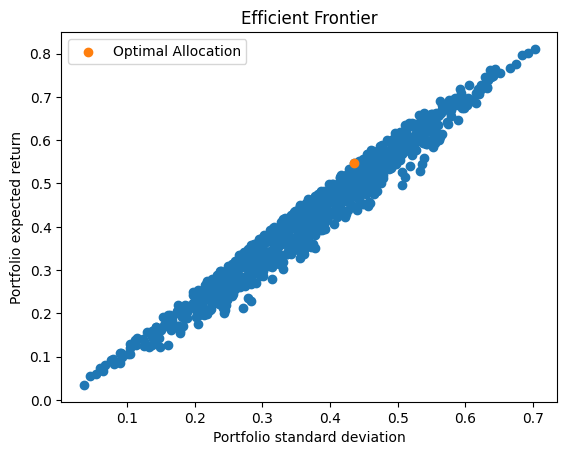

In [61]:
fig, ax = plt.subplots(1,1)
ax.scatter(x=s_p_list, y=e_p_list)
ax.scatter(x=opt_s_p, y=opt_e_p, label='Optimal Allocation')
ax.set_title("Efficient Frontier")
ax.set_xlabel("Portfolio standard deviation")
ax.set_ylabel("Portfolio expected return")
ax.legend()
